# 주피터 노트북(파이썬)으로 온도 데이타를 SQL에 저장하고 시계열분석하기

<img src="https://raw.githubusercontent.com/leehaesung/SQLite3_with_LTE_CatM1/master/01_Images/01_Setting.png" height="400" width="450" >

* How to install Paho-MQTT on Linux/Mac :
```
sudo pip install paho-mqtt
```

* How to install SQLite3 on Linux/Mac:
```
sudo apt-get update
sudo apt-get install sqlite3 libsqlite3-dev
```

In [68]:
!pip install paho-mqtt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Eclipse Paho™ MQTT Python Pub/Sub Client

In [18]:
import sys
import json

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['catm1topic']

m = subscribe.simple(topics, hostname="broker.hivemq.com", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)
    da = json.loads(a.payload)
    print(da)
    json_data = da["temperature"]
    print(json_data)

catm1topic
b'{"device":"catm1","temperature":"20.211"}'
{'device': 'catm1', 'temperature': '20.211'}
20.211
catm1topic
b'{"device":"catm1","temperature":"20.211"}'
{'device': 'catm1', 'temperature': '20.211'}
20.211


## DROP TABLE
#### 생략하고 진행 혹은 필요시만

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [25]:
import sqlite3
conn = sqlite3.connect('sqliteLTECatM1')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print("Deleted the table successfully");
conn.commit()
conn.close()

Deleted the table successfully


## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [5]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");

conn.close()

Table created successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [6]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("INSERT INTO HOME (LOCAL,TEMP) \
      VALUES (20190604033350, 24)");

conn.commit()
print("Records created successfully");
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [7]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print("Local Time   = ", row[0])
    print("Temperature  = ", row[1])
    print("\n")
   

print("Operation done successfully");
conn.close()

Opened database successfully
Local Time   =  20190604033350
Temperature  =  24


Operation done successfully


In [10]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1');
print("Opened database successfully");
print("");
print("     Date       | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

     Date       | Temperature[°C]:
20190604033350  |  24


### Searching Temperature Data

In [13]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteLTECatM1')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print("Opened database successfully")
    print("")
    print("     Date       | Temperature[°C]:")
    print("==================================")
    
    for row in cursor:
        print(row[0]," | ",row[1])

In [14]:
# Put any temperature.
search_temperature(24)

Opened database successfully

     Date       | Temperature[°C]:
20190604033350  |  24


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [15]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("DELETE from HOME where LOCAL = 20190604033350;")
#conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514283551781 AND 1514285943367;")
conn.commit()
print("Total number of rows deleted :", conn.total_changes)

print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1])

print("DELETE Operation done successfully")
conn.close()

Opened database successfully
Total number of rows deleted : 1

    Date      | Temperature[°C]:
DELETE Operation done successfully


##  INSERT QUERY (IN REAL TIME)
#### 종료하기위해서는 저장한후에 주피터를 실행했던 터미널 커맨드창에서 Ctrl + C 누릅니다.  다시 주피터를 열어주세요.

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale
import json
import datetime

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");
conn.close()

conn = sqlite3.connect('sqliteLTECatM1')
print("Database opend successfully")
print("")
print("INSERT OPERATION")
print("     Date       | Temperature[°C]:")
print("==================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    # {"device":"catm1","temperature":"29.011"}
    local = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
       
    jsonData = json.loads(data)
    temp = str(jsonData['temperature'])         
    
    print(local," | ",temp)
    
    str1 = "INSERT INTO HOME (LOCAL,TEMP) \
      VALUES ("
    str2 = local 
    str3 = ", "
    str4 = temp
    str5 = " )"
    insert = str1 + str2 + str3 + str4 + str5
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "catm1topic", hostname="broker.hivemq.com")

Table created successfully
Database opend successfully

INSERT OPERATION
     Date       | Temperature[°C]:
20190604115413  |  30.911


## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [24]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("     Date       | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

     Date       | Temperature[°C]:
20190604114155  |  19.814
20190604114205  |  19.814
20190604114215  |  19.814
20190604114225  |  19.814
20190604114235  |  19.814
20190604114245  |  19.814
20190604114255  |  19.814
20190604114312  |  20.21
20190604114322  |  20.21
20190604114331  |  20.21
20190604114342  |  20.21
20190604114351  |  20.21
20190604114402  |  20.21
20190604114416  |  21.11
20190604114426  |  21.11
20190604114436  |  21.11
20190604114446  |  21.11
20190604114458  |  22.716
20190604114507  |  22.716
20190604114517  |  22.716
20190604114535  |  24.116
20190604114545  |  24.116
20190604114555  |  24.116
20190604114616  |  25.114
20190604114623  |  25.114
20190604114633  |  25.114
20190604114643  |  25.114
20190604114657  |  26.119
20190604114707  |  26.119
20190604114717  |  26.119
20190604114737  |  28.119
20190604114746  |  28.119
20190604114756  |  28.119
20190604114808  |  29.511
20190604114818  |  29.511
20190604114833  |  30.911


## SELECT QUERY & PUSH DATA INTO BOX

In [2]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self, item):
        return self.items.pop(item)

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


tempBox = Stack()
temPopBox = Stack() 
timeBox = Stack()

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")

cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    tempBox.push(row[1])
    temPopBox.push(row[1])
    
    #print(row[0],row[1],row[2])

# Making time = 1,2,3,4 .... n    
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
print("x(time) = ")    
print(timeBox.items)
print("")
print("y1(Temperature) = ") 
print(tempBox.items)
print("")

xTime = timeBox.items
y1Data = tempBox.items

# Comparing between max and min in tData
highTemBit = y1Data.pop(max-1)
lowTemBit = y1Data.pop(0)


if highTemBit > lowTemBit:
    print("The temperature data is ascending.")

elif highTemBit < lowTemBit:
    print("The temperature data is descending.")
    
elif highTemBit == lowTemBit:
    print("The temperature data is stable.")
    
conn.close()

Opened database successfully

x(time) = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

y1(Temperature) = 
[19.814, 19.814, 19.814, 19.814, 19.814, 19.814, 19.814, 20.21, 20.21, 20.21, 20.21, 20.21, 20.21, 21.11, 21.11, 21.11, 21.11, 22.716, 22.716, 22.716, 24.116, 24.116, 24.116, 25.114, 25.114, 25.114, 25.114, 26.119, 26.119, 26.119, 28.119, 28.119, 28.119, 29.511, 29.511, 30.911]

The temperature data is ascending.


In [3]:
print("Max & Min Temperature:")
print(highTemBit)
print(lowTemBit)

Max & Min Temperature:
30.911
19.814


## Export CSV file

In [4]:
import sqlite3
import csv

sqlconnector = sqlite3.connect('sqliteLTECatM1')
sql3_cursor = sqlconnector.cursor()
sql3_cursor.execute('SELECT * FROM HOME')
with open('temp_catm1.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)
sqlconnector.close()

In [5]:
!ls *.csv

mydb_hum.csv   mydb_temp.csv  pm10.csv       pm25.csv       temp_catm1.csv


In [6]:
!cat temp_catm1.csv

In [9]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#
# Data sets

In [10]:
#view basic stats information on data
series.describe()

count    36.000000
mean     23.277694
std       3.407104
min      19.814000
25%      20.210000
50%      22.716000
75%      25.365250
max      30.911000
Name: TEMP, dtype: float64

In [11]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 

#view top 10 records
series.head(5)

LOCAL
2019-06-04 11:41:55    19.814
2019-06-04 11:42:05    19.814
2019-06-04 11:42:15    19.814
2019-06-04 11:42:25    19.814
2019-06-04 11:42:35    19.814
Name: TEMP, dtype: float64

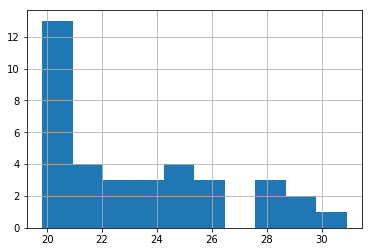

In [12]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

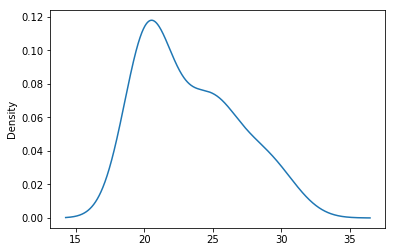

In [13]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

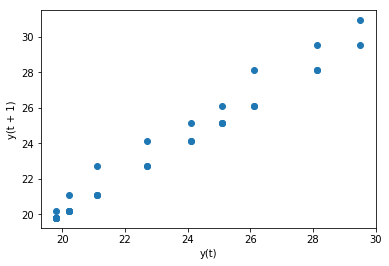

In [14]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [15]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe
print(result)

         t     t+1
0      NaN  19.814
1   19.814  19.814
2   19.814  19.814
3   19.814  19.814
4   19.814  19.814
5   19.814  19.814
6   19.814  19.814
7   19.814  20.210
8   20.210  20.210
9   20.210  20.210
10  20.210  20.210
11  20.210  20.210
12  20.210  20.210
13  20.210  21.110
14  21.110  21.110
15  21.110  21.110
16  21.110  21.110
17  21.110  22.716
18  22.716  22.716
19  22.716  22.716
20  22.716  24.116
21  24.116  24.116
22  24.116  24.116
23  24.116  25.114
24  25.114  25.114
25  25.114  25.114
26  25.114  25.114
27  25.114  26.119
28  26.119  26.119
29  26.119  26.119
30  26.119  28.119
31  28.119  28.119
32  28.119  28.119
33  28.119  29.511
34  29.511  29.511
35  29.511  30.911


### Autocorrelation (자기상관도)

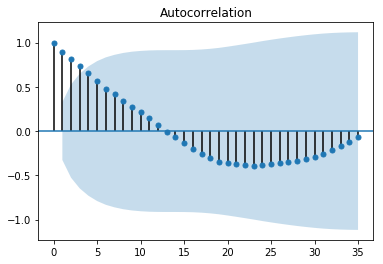

In [17]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=35)
pyplot.show()

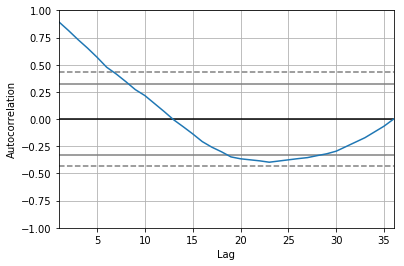

In [18]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

{sensor:21.110000,prediction:21.110000}
{sensor:22.716000,prediction:21.110000}
{sensor:22.716000,prediction:22.700089}
{sensor:22.716000,prediction:24.745543}
{sensor:24.116000,prediction:22.720354}
{sensor:24.116000,prediction:24.106483}
{sensor:24.116000,prediction:24.106483}
{sensor:25.114000,prediction:27.756483}
{sensor:25.114000,prediction:25.130758}
{sensor:25.114000,prediction:25.130758}
{sensor:25.114000,prediction:28.312576}
{sensor:26.119000,prediction:25.162282}
{sensor:26.119000,prediction:26.157325}
{sensor:26.119000,prediction:28.425507}
{sensor:28.119000,prediction:26.179797}
{sensor:28.119000,prediction:28.159982}
{sensor:28.119000,prediction:28.159982}
{sensor:29.511000,prediction:30.444073}
{sensor:29.511000,prediction:29.560820}
{sensor:30.911000,prediction:29.560820}
{TestRMSE:1.388}


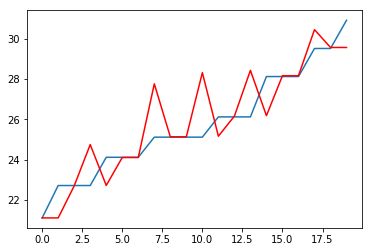

In [21]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
testLength = 20;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (obs, yhat))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 0.664


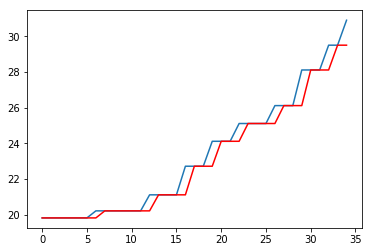

In [22]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
testLength = 35;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## References

- How to Install SQLite On Windows/ Linux / Mac OS X: http://www.codebind.com/sqlite/how-to-install-sqlite-on/

In [ ]:
# END